# Objective
> The primary objective of this case study is to develop, test, and optimize 2–3 day trading strategies focused on small to large-cap equities with a holding period of 1min – 7 hours. The aim is to capitalize on short-term market movements using quantitative and technical techniques. -  Stratagem Research

## Day Trading Strategies
#### ICT Methods (Inner Circle Trader):
> How it works: ICT methods focus on market manipulation by large institutions. They use concepts like market structure, order blocks, liquidity pools, and imbalance areas. Traders look for price action signals in these areas to enter and exit trades.

> Downsides: Requires deep understanding and experience. Not suitable for beginners due to complexity. Markets may not always behave as predicted by ICT concepts.

#### Gap Hunts:
> How it works: Traders exploit price gaps that occur when the market opens significantly higher or lower than the previous close. They anticipate that the gap will fill (the price will move back to the previous close level).

> Downsides: Not all gaps fill, and trying to trade every gap can lead to significant losses. Market conditions need to be right for gap trading to be effective.

#### Momentum/Trend Following:
> How it works: Traders follow the prevailing trend, buying in an uptrend and selling in a downtrend. They use indicators like Moving Averages, Relative Strength Index (RSI), and MACD to identify trends and confirm momentum.

> Downsides: Trends can reverse suddenly, leading to losses. Trend-following can also lead to late entries and exits, reducing profit margins. It can be challenging in sideways or choppy markets.

#### Pullbacks:
> How it works: Traders look for temporary price retracements within a larger trend. They enter trades in the direction of the trend after the price pulls back to a support or resistance level.

> Downsides: Determining the end of a pullback can be difficult. Pullbacks can turn into full trend reversals, leading to losses. Requires accurate timing and market analysis.

#### Mean Reversions:
> How it works: Traders assume that prices will revert to their historical average or mean. They buy when prices are below the mean and sell when prices are above the mean, using indicators like Bollinger Bands and moving averages (Can use different rolling and estimated moving averages over different time frames).

> Downsides: Prices may stay overbought or oversold for extended periods, leading to significant drawdowns. Mean reversion strategies can fail in trending markets where prices move far from the mean.

#### Breakouts:
> How it works: Traders enter positions when the price breaks through a significant support or resistance level with increased volume. They use indicators like Bollinger Bands, trendlines, and pivot points to identify breakouts.

> Downsides: False breakouts (fakeouts) are common, leading to losses. Requires quick decision-making and fast execution. High volatility can result in large price swings against the trader.

## Detailed Market Scenarios and the use of these 6 different trading strategies:
> #### High Volatility Market
>> The market experiences a sudden spike in volatility due to unexpected geopolitical tensions. Stock prices exhibit wide intraday swings, and the VIX (Volatility Index) spikes to its highest level in months.
>>> ICT Methods: How do order blocks and liquidity pools behave under extreme volatility?

>>> Gap Hunts: Evaluate the frequency and reliability of gap fills during high volatility.

>>> Momentum/Trend Following: Assess the ability to ride short-term trends amidst rapid price movements.

>>> Pullbacks: Test the identification and success rate of pullbacks during large price swings.

>>> Mean Reversions: Check the viability of mean reversion trades in a highly volatile environment.

>>> Breakouts: Monitor the success rate of breakouts and false breakouts.

> #### Market Announcement Day
>> The Federal Reserve is scheduled to announce its interest rate decision. Leading up to the announcement, the market is relatively calm, but significant price movements are expected once the announcement is made. A company is about to annouce its earnings or has a significant event lined up: eg: WWDC for AAPL
>>> ICT Methods: Monitor price action around key levels before and after the announcement.

>>> Gap Hunts: Identify potential gaps created by the announcement and their fill probabilities.

>>> Momentum/Trend Following: Track the emergence of new trends post-announcement.

>>> Pullbacks: Evaluate pullback opportunities created by the initial price reaction.

>>> Mean Reversions: Assess the potential for price reversion following the initial announcement shock.

>>> Breakouts: Identify breakout opportunities around the announcement time.

> #### Typical Trading Day
>> The market exhibits typical behavior with moderate volatility, influenced by regular economic data releases.
>>> ICT Methods: Observe how standard market structures and liquidity pools behave in normal conditions.

>>> Gap Hunts: Evaluate the occurrence and reliability of gaps on a regular trading day.

>>> Momentum/Trend Following: Test the ability to follow medium-term trends in a stable environment.

>>> Pullbacks: Identify and trade pullbacks in the context of ongoing trends.

>>> Mean Reversions: Monitor opportunities for mean reversion trades in a balanced market.

>>> Breakouts: Identify and trade breakouts from established support and resistance levels.

<div class="alert alert-block alert-info">
Code for Gap Hunts
</div>

In [50]:
import numpy as np
import pandas as pd
import yfinance as yf
from math import sqrt
import matplotlib.pyplot as plt
from datetime import timedelta
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
rcParams['font.family'] = 'serif'
import seaborn as sb
pd.set_option('min_rows',125)
sb.set()

In [33]:
## ticker = yf.download('SPY','2010-1-1') # The ticker can be changed based on what stock you want to implement the strategy on
ticker_day = yf.download(['SPY'],period='6mo',interval='1d')
vix = yf.download(['^VIX'],period='6mo',interval='1d') # Important to note that this is expected annualized volatility for the next 30 days, to convert it into daily volatility I will divide it by sqrt 252 
ticker_day['VIX'] = vix['Close']/sqrt(252)
ticker_day


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,VIX
Date,,,,,,,
2024-01-03,470.429993,471.190002,468.170013,468.790009,465.835144,103585900,0.884437
2024-01-04,468.299988,470.959991,467.049988,467.279999,464.334625,84232200,0.890106
2024-01-05,467.489990,470.440002,466.429993,467.920013,464.970642,86060800,0.840971
2024-01-08,468.429993,474.750000,468.299988,474.600006,471.608521,74879100,0.823963
2024-01-09,471.869995,474.929993,471.350006,473.880005,470.893066,65931400,0.803804
...,...,...,...,...,...,...,...
2024-06-26,543.690002,546.239990,543.030029,545.510010,545.510010,38550600,0.790576
2024-06-27,545.369995,546.960022,544.609985,546.369995,546.369995,35041500,0.771048
2024-06-28,547.159973,550.280029,542.950012,544.219971,544.219971,76144500,0.783646


In [34]:
ticker_day['Gap'] = ticker_day['Open']-ticker_day['Close'].shift(1)
ticker_day

,Open,High,Low,Close,Adj Close,Volume,VIX,Gap
Date,,,,,,,,
2024-01-03,470.429993,471.190002,468.170013,468.790009,465.835144,103585900,0.884437,NaN
2024-01-04,468.299988,470.959991,467.049988,467.279999,464.334625,84232200,0.890106,-0.490021
2024-01-05,467.489990,470.440002,466.429993,467.920013,464.970642,86060800,0.840971,0.209991
2024-01-08,468.429993,474.750000,468.299988,474.600006,471.608521,74879100,0.823963,0.509979
2024-01-09,471.869995,474.929993,471.350006,473.880005,470.893066,65931400,0.803804,-2.730011
...,...,...,...,...,...,...,...,...
2024-06-26,543.690002,546.239990,543.030029,545.510010,545.510010,38550600,0.790576,-1.140015
2024-06-27,545.369995,546.960022,544.609985,546.369995,546.369995,35041500,0.771048,-0.140015
2024-06-28,547.159973,550.280029,542.950012,544.219971,544.219971,76144500,0.783646,0.789978


It is important to realise that everyday, markets open either up or down but to have a significant impact, the percentages should be large enough, therefore I would be describing the statistics of the Gap column to find further statistics. 

In [35]:
ticker_day['Gap'].describe()

count    124.000000
mean       0.408470
std        2.204519
min       -6.450012
25%       -0.727486
50%        0.499985
75%        1.727501
max        6.800018
Name: Gap, dtype: float64

The average change is +0.133163$ however, taking the standard deviation we see that approx 68% of our data lies within 0.133163 
+- 1.710912.

Approximately 95% of our data then lies within 0.133163 +- 3.421924

In [36]:
one_std = np.arange(ticker_day['Gap'].mean().round(4)-ticker_day['Gap'].std().round(4),ticker_day['Gap'].mean().round(4)+ticker_day['Gap'].std().round(4),0.0001)
two_std = np.arange(ticker_day['Gap'].mean().round(4)-2*ticker_day['Gap'].std().round(4),ticker_day['Gap'].mean().round(4)+2*ticker_day['Gap'].std().round(4),0.0001)

First, I will try to test the strategy with one_std and if that yields lower accuracy, we will try the two_std, just because the frequency of the former would be higher therefore more number of trades

In [37]:
ticker_day['Gap_Up'] = np.where(ticker_day['Gap']>one_std[-1],1,0)
ticker_day['Gap_Down'] = np.where(ticker_day['Gap']<one_std[0],1,0)
ticker_day['Gap_Up2'] = np.where(ticker_day['Gap']>two_std[-1],1,0)
ticker_day['Gap_Down2'] = np.where(ticker_day['Gap']<two_std[0],1,0)
ticker_day['Position'] = 0
ticker_day['PnL'] = 0
ticker_day
#ticker_day[ticker_day['Gap_Up']==1].index

,Open,High,Low,Close,Adj Close,Volume,VIX,Gap,Gap_Up,Gap_Down,Gap_Up2,Gap_Down2,Position,PnL
Date,,,,,,,,,,,,,,
2024-01-03,470.429993,471.190002,468.170013,468.790009,465.835144,103585900,0.884437,NaN,0,0,0,0,0,0
2024-01-04,468.299988,470.959991,467.049988,467.279999,464.334625,84232200,0.890106,-0.490021,0,0,0,0,0,0
2024-01-05,467.489990,470.440002,466.429993,467.920013,464.970642,86060800,0.840971,0.209991,0,0,0,0,0,0
2024-01-08,468.429993,474.750000,468.299988,474.600006,471.608521,74879100,0.823963,0.509979,0,0,0,0,0,0
2024-01-09,471.869995,474.929993,471.350006,473.880005,470.893066,65931400,0.803804,-2.730011,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26,543.690002,546.239990,543.030029,545.510010,545.510010,38550600,0.790576,-1.140015,0,0,0,0,0,0
2024-06-27,545.369995,546.960022,544.609985,546.369995,546.369995,35041500,0.771048,-0.140015,0,0,0,0,0,0
2024-06-28,547.159973,550.280029,542.950012,544.219971,544.219971,76144500,0.783646,0.789978,0,0,0,0,0,0


In [46]:
for i in range(0,len(ticker_day)):
    if ticker_day['Gap_Up'].iloc[i] ==1:
        if ticker_day['Gap_Up2'].iloc[i] ==1:
            entry_price = ticker_day['Open'].iloc[i]
            ticker_day['Position'].iloc[i] = -2
        else:
            entry_price = ticker_day['Open'].iloc[i]
            ticker_day['Position'].iloc[i] = -1
        Date = ticker_day[ticker_day['Open']==entry_price].index
        for j in Date:
            ticker = pd.DataFrame()
            ticker = yf.download('SPY',j,j+timedelta(days=0,hours=23),interval='5m')
            print(ticker)
            for k in range(0,len(ticker)):
                if ticker['Close'].iloc[k]>(100+ticker_day['VIX'].iloc[i]/2)*entry_price: # Trigger Stoploss if it moves above half of its expected volatility
                    exit_price = ticker['Close'].iloc[k]
                if ticker['Close'].iloc[k]<(100-ticker_day['VIX'].iloc[i]/2)*entry_price: # Target if it moves below half of its expected movement
                    exit_price = ticker['Close'].iloc[k]
                else:
                    exit_price = ticker_day['Close'].iloc[i]
        if ticker_day['Position'].iloc[i]==-2:
            ticker_day['PnL'].iloc[i] = 2*(entry_price - exit_price)
        else:
            ticker_day['PnL'].iloc[i] = entry_price - exit_price
    elif ticker_day['Gap_Down'].iloc[i] ==1:
        if ticker_day['Gap_Down2'].iloc[i] ==1:
            entry_price = ticker_day['Open'].iloc[i]
            ticker_day['Position'].iloc[i] = 2
        else:
            entry_price = ticker_day['Open'].iloc[i]
            ticker_day['Position'].iloc[i] = -1
        Date = ticker_day[ticker_day['Open']==entry_price].index
        for j in Date:
            print(j)
            ticker = pd.DataFrame()
            ticker = yf.download('SPY',j,j+timedelta(days=0,hours=23),interval='5m')
            for k in range(0,len(ticker)):
                if ticker['Close'].iloc[k]>(100+ticker_day['VIX'].iloc[i]/2)*entry_price: # Target if it moves below half of its expected movement
                    exit_price = ticker['Close'].iloc[k]
                if ticker['Close'].iloc[k]<(100-ticker_day['VIX'].iloc[i]/2)*entry_price: # Trigger Stoploss if it moves above half of its expected volatility
                    exit_price = ticker['Close'].iloc[k]
                else:
                    exit_price = ticker_day['Close'].iloc[i]
        if ticker_day['Position'].iloc[i]==-2:
            ticker_day['PnL'].iloc[i] = 2*(exit_price - entry_price)
        else:
            ticker_day['PnL'].iloc[i] = exit_price-entry_price
count = 0
for i in range(0,len(ticker_day)):
    if ticker_day['Position'].iloc[i] == 0:
        continue
    else:
        count +=1
ticker_day['Cumulative_PnL'] = ticker_day['PnL'].cumsum()
ticker_day


/tmp/ipykernel_1796/1518822262.py:31: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ticker_day['Position'].iloc[i] = -1
/tmp/ipykernel_1796/1518822262.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/tmp/ipykernel_1796/1518822262.py:47: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ticker_day['PnL'].iloc[i] = exit_price-entry_price
/tmp/ipykernel_1796/1518822262.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

2024-01-09 00:00:00
2024-01-17 00:00:00
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
2024-01-31 00:00:00
2024-02-13 00:00:00
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
2024-03-05 00:00:00
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
2024-03-15 00:00:00
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SPY']: YFChartError('%ticker%: 5m data not available for startTime=1711512000 and endTime=1711594800. The requested range must be within the last 60 days.')
/tmp/ipykernel_1796/1518822262.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://panda

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
2024-04-02 00:00:00
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
2024-04-10 00:00:00
2024-04-12 00:00:00
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
2024-04-25 00:00:00
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
2024-05-08 00:00:00
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-05-23 09:30:00-04:00  532.960022  533.070007  531.809998  531.859985   
2024-05-23 09:35:00-04:00  531.840027  532.070007  531.620911  531.840027   
2024-05-23 09:40:00-04:00  531.830017  


/tmp/ipykernel_1796/1518822262.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ticker_day['PnL'].iloc[i] = entry_price - exit_price
/tmp/ipykernel_1796/1518822262.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-06-12 09:30:00-04:00  541.359985  541.710022  541.244995  541.330017   
2024-06-12 09:35:00-04:00  541.359985  541.830017  541.270020  541.770020   
2024-06-12 09:40:00-04:00  541.775024  542.679993  541.669983  542.670105   
2024-06-12 09:45:00-04:00  542.659973  542.880005  542.494995  542.849976   
2024-06-12 09:50:00-04:00  542.859985  542.900024  542.349976  542.359985   
2024-06-12 09:55:00-04:00  542.359985  542.960022  542.353210  542.688721   
2024-06-12 10:00:00-04:00  542.679993  542.969971  542.539978  542.900024   
2024-06-12 10:05:00-04:00  542.909973  542.989990  542.585022  542.690002   
2024-06-12 10:10:00-04:00  542.690002  543.175110  542.580017  543.130005   
2024-06-12 10:15:00-04:00  543.130005  543.479980  543.130005  543.359985   
2024-06-12 10:20:00-04:00  543.359985  543.560608  543.242920  543.510010   

,Open,High,Low,Close,Adj Close,Volume,VIX,Gap,Gap_Up,Gap_Down,Gap_Up2,Gap_Down2,Position,PnL,Cumulative_PnL
Date,,,,,,,,,,,,,,,
2024-01-03,470.429993,471.190002,468.170013,468.790009,465.835144,103585900,0.884437,NaN,0,0,0,0,0,0.000000,0.000000
2024-01-04,468.299988,470.959991,467.049988,467.279999,464.334625,84232200,0.890106,-0.490021,0,0,0,0,0,0.000000,0.000000
2024-01-05,467.489990,470.440002,466.429993,467.920013,464.970642,86060800,0.840971,0.209991,0,0,0,0,0,0.000000,0.000000
2024-01-08,468.429993,474.750000,468.299988,474.600006,471.608521,74879100,0.823963,0.509979,0,0,0,0,0,0.000000,0.000000
2024-01-09,471.869995,474.929993,471.350006,473.880005,470.893066,65931400,0.803804,-2.730011,0,1,0,0,-1,72.260010,72.260010
2024-01-10,474.160004,477.450012,473.869995,476.559998,473.556152,67310600,0.799395,0.279999,0,0,0,0,0,0.000000,72.260010
2024-01-11,477.589996,478.119995,472.260010,476.350006,473.347504,77940700,0.783646,1.029999,0,0,0,0,0,0.000000,72.260010
2024-01-12,477.839996,478.600006,475.230011,476.679993,473.675385,57944000,0.800025,1.489990,0,0,0,0,0,0.000000,72.260010
2024-01-16,475.260010,476.609985,473.059998,474.929993,471.936401,85014900,0.871838,-1.419983,0,0,0,0,0,0.000000,72.260010


<div class="alert alert-block alert-info">
Code for Moving Averages
</div>

In [23]:
# We need a fresh Dataframe for SPY
SPY = yf.download(['SPY'],'2020-1-1')
del SPY['Volume']
del SPY['Open']
del SPY['High']
del SPY['Low']
del SPY['Adj Close']

[*********************100%%**********************]  1 of 1 completed


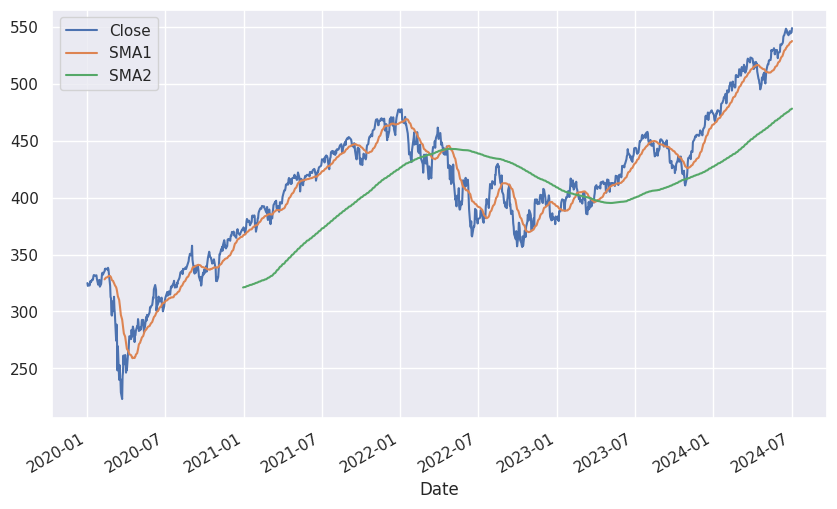

In [25]:
SMA1 = 28
SMA2 = 252
SPY['SMA1'] = SPY['Close'].rolling(SMA1).mean()
SPY['SMA2'] = SPY['Close'].rolling(SMA2).mean()
SPY.plot(figsize=(10,6));

To trade: 
> Go long when the 28 SMA is bove the 252 SMA

> Go short when vice versa

<div class="alert alert-block alert-info">
Code Employing Long Short Term Memory to Predict the Price Movement the following day
</div>

In [61]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [58]:
data_spy = yf.download('SPY','2010-1-1')
data_spy

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,86.580765,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,86.809921,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,86.871040,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,87.237747,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,87.528076,126402800
2010-01-11,115.080002,115.129997,114.239998,114.730003,87.650291,106375700
2010-01-12,113.970001,114.209999,113.220001,113.660004,86.832840,163333500
2010-01-13,113.949997,114.940002,113.370003,114.620003,87.566269,161822000
2010-01-14,114.489998,115.139999,114.419998,114.930000,87.803070,115718800


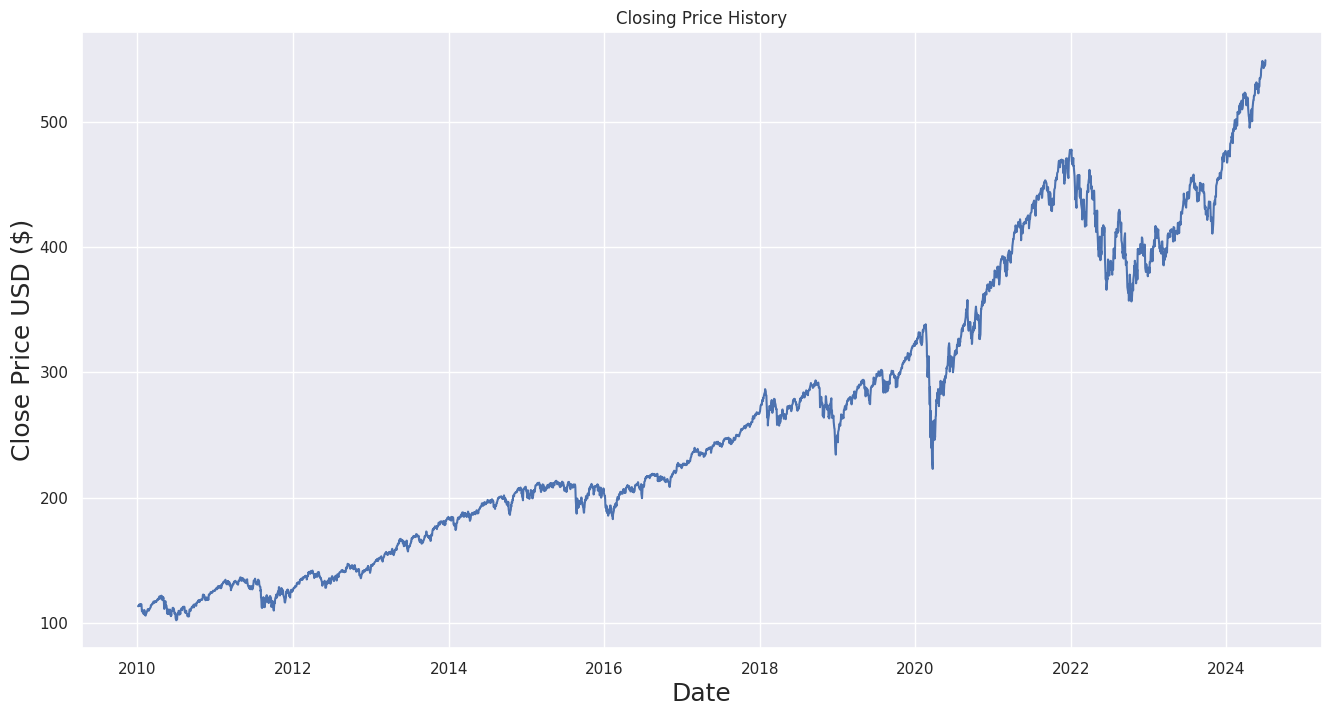

In [59]:
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(data_spy['Close'])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Close Price USD ($)",fontsize = 18)
plt.show()

In [63]:
data = data_spy.filter(['Close'])
#Convert the data frame to numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*0.8) # Training about 80% of the data
training_data_len

2919

In [65]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02490993],
       [0.02558134],
       [0.02576039],
       ...,
       [0.98927947],
       [0.99178626],
       [1.        ]])

In [66]:
#Create the training data set, create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0]) # will contain 60 values
    y_train.append(train_data[i,0]) # will contain 61st value
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.02490993, 0.02558134, 0.02576039, 0.02683468, 0.02768515,
       0.02804325, 0.0256485 , 0.02779706, 0.02849086, 0.02560373,
       0.02878181, 0.02616325, 0.02126183, 0.015689  , 0.01694232,
       0.01591281, 0.01707662, 0.01425662, 0.01161568, 0.01535328,
       0.01830756, 0.01707662, 0.0094895 , 0.00998189, 0.00825855,
       0.01123521, 0.01076521, 0.01327186, 0.01307044, 0.01687518,
       0.018039  , 0.01949376, 0.02000851, 0.02005328, 0.01703185,
       0.01929232, 0.01895661, 0.01911327, 0.02168708, 0.02238088,
       0.0226047 , 0.02336564, 0.02696896, 0.02701372, 0.02743896,
       0.02858039, 0.02965466, 0.02967705, 0.02974419, 0.03180324,
       0.03334751, 0.03321323, 0.03081848, 0.03220608, 0.03404133,
       0.0327656 , 0.03234038, 0.03218371, 0.03383989, 0.03401894])]
[0.033123704991380204]

[array([0.02490993, 0.02558134, 0.02576039, 0.02683468, 0.02768515,
       0.02804325, 0.0256485 , 0.02779706, 0.02849086, 0.02560373,
       0.02878181, 0.02616325, 0.0

In [67]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [68]:
#Reshape the data, LSTM expects the data to be 3dimensional: number of samples, number of time steps, number of features
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2859, 60, 1)

In [69]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
#Compile the Model
model.compile(optimizer='adam',loss='mean_squared_error')

In [71]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2859/2859 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - loss: 0.0018


In [72]:
#Create the testing data set
#Create a new array containing new scaled values from index end of training set to full testing data set
test_data = scaled_data[training_data_len-60:,:]
#Create the data sets x_test, y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [73]:
#Convert the data into scaled values, numpy arrays
x_test = np.array(x_test)

In [74]:
#Reshape it to 3d
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [75]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [76]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions-y_test)**2))
rmse

16.442701474898886

/tmp/ipykernel_1796/4098270735.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


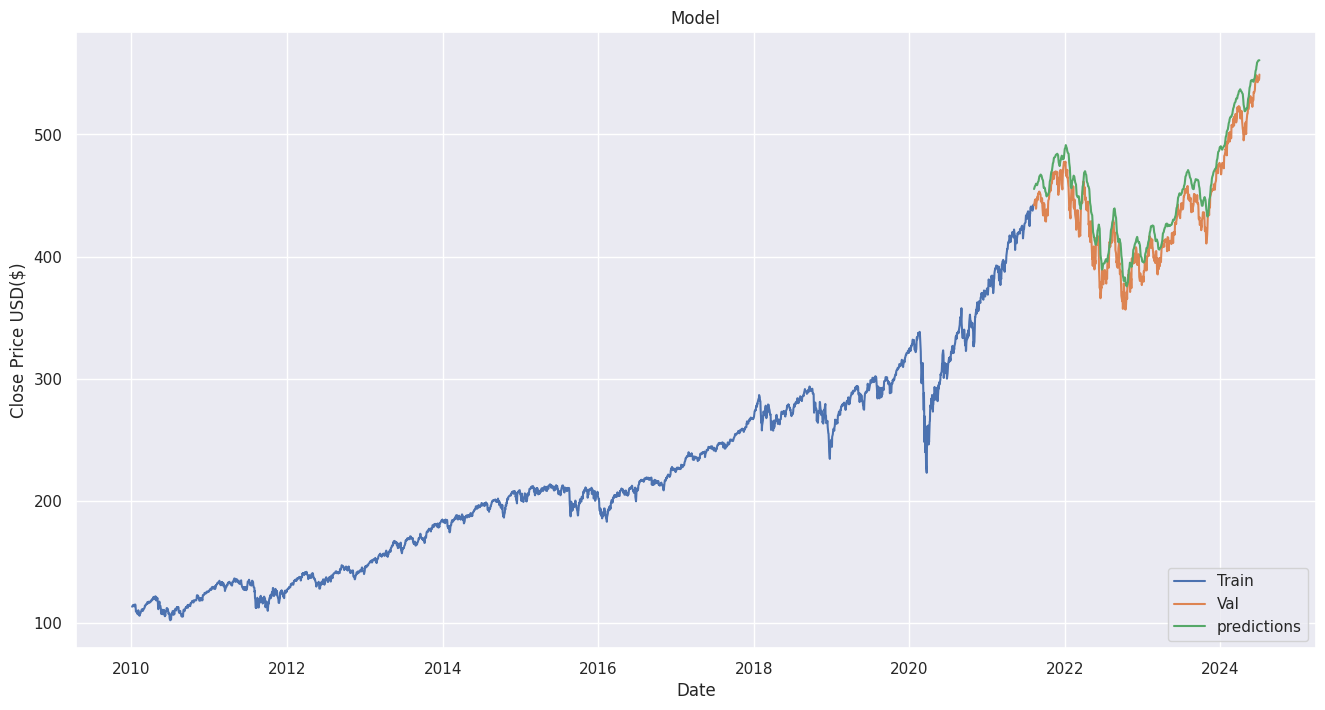

In [77]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc = 'lower right')
plt.show()

In [86]:
valid['Open'] = data_spy['Open']
valid['Position'] = 0
valid['PnL'] = 0
new_order = ['Open','Close','predictions','Position','PnL']
valid = valid[new_order]
valid

,Open,Close,predictions,Position,PnL
Date,,,,,
2021-08-09,442.459991,442.130005,455.308105,0,0
2021-08-10,442.609985,442.679993,455.816193,0,0
2021-08-11,443.820007,443.779999,456.322723,0,0
2021-08-12,443.619995,445.109985,456.893707,0,0
2021-08-13,445.589996,445.920013,457.580505,0,0
2021-08-16,444.529999,446.970001,458.340637,0,0
2021-08-17,444.239990,444.040009,459.173950,0,0
2021-08-18,442.959991,439.179993,459.631927,0,0
2021-08-19,436.269989,439.859985,459.325958,0,0


In [93]:
count = 0
for i in range(1,len(valid)):
    if valid["predictions"].iloc[i]-valid['predictions'].iloc[i-1]>0:
        entry_price = valid['Open'].iloc[i]
        exit_price = valid['Close'].iloc[i]
        valid['Position'].iloc[i] = 1
        valid['PnL'].iloc[i] = exit_price-entry_price
        count+=1
    elif valid["predictions"].iloc[i]-valid['predictions'].iloc[i-1]<0:
        entry_price = valid['Open'].iloc[i]
        exit_price = valid['Close'].iloc[i]
        valid['Position'].iloc[i] = -1
        valid['PnL'].iloc[i] = entry_price-exit_price
        count+=1
valid['Cumulative_PnL'] = valid['PnL'].cumsum()
valid


/tmp/ipykernel_1796/45961738.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  valid['Position'].iloc[i] = 1
/tmp/ipykernel_1796/45961738.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

,Open,Close,predictions,Position,PnL,Cumulative_PnL
Date,,,,,,
2021-08-09,442.459991,442.130005,455.308105,0,0.000000,0.000000
2021-08-10,442.609985,442.679993,455.816193,1,0.070007,0.070007
2021-08-11,443.820007,443.779999,456.322723,1,-0.040009,0.029999
2021-08-12,443.619995,445.109985,456.893707,1,1.489990,1.519989
2021-08-13,445.589996,445.920013,457.580505,1,0.330017,1.850006
2021-08-16,444.529999,446.970001,458.340637,1,2.440002,4.290009
2021-08-17,444.239990,444.040009,459.173950,1,-0.199982,4.090027
2021-08-18,442.959991,439.179993,459.631927,1,-3.779999,0.310028
2021-08-19,436.269989,439.859985,459.325958,-1,-3.589996,-3.279968
